About Dataset

Dataset Information

This dataset contains information on default payments, demographic factors, credit
data, history of payment, and bill statements of credit card clients in Taiwan from April
2005 to September 2005.
Content
There is 25 Variable:

● ID: ID of each client

● LIMIT_BAL: Amount of given credit in NT dollars (includes individual and
family/supplementary credit

● SEX: Gender (1=male, 2=female)

● EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others,
5=unknown, 6=unknown)

● MARRIAGE: Marital status (1=married, 2=single, 3=others)

● AGE: Age in years

● PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for
one month, 2=payment delay for two months, ... 8=payment delay for eight
months, 9=payment delay for nine months and above)

● PAY_2: Repayment status in August, 2005 (scale same as above)

● PAY_3: Repayment status in July, 2005 (scale same as above)

● PAY_4: Repayment status in June, 2005 (scale same as above)

● PAY_5: Repayment status in May, 2005 (scale same as above)

● PAY_6: Repayment status in April, 2005 (scale same as above)

● BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

● BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

● BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

● BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

● BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

● BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

● PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

● PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

● PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

● PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

● PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

● PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

● default.payment.next.month: Default payment (1=yes, 0=no)

Inspiration

Some ideas for exploration:
1. How does the probability of default payment vary by categories of different
demographic variables?
2. Which variables are the strongest predictors of default payment
Note: After completion of all the task you need to create a PowerPoint presentation
That should contain the :
1. Problem Statement
2. Tools Used
3. Approaches
4. EDA Insights
5. Best ML Model
6. Evaluation Metrics of Model
7. Future Development

#Importing the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# Importing the dataset

In [2]:
df=pd.read_csv("/content/UCI_Credit_Card.csv")

# Exploring with Dataset


In [3]:
df.head().T

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0
SEX,2.0,2.0,2.0,2.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,2.0
MARRIAGE,1.0,2.0,2.0,1.0,1.0
AGE,24.0,26.0,34.0,37.0,57.0
PAY_0,2.0,-1.0,0.0,0.0,-1.0
PAY_2,2.0,2.0,0.0,0.0,0.0
PAY_3,-1.0,0.0,0.0,0.0,-1.0
PAY_4,-1.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
df.isna().sum().sum()

0

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [7]:
for i in list(df.columns):
  print("Unique values of ",i,"is")
  print(df[i].nunique())

Unique values of  ID is
30000
Unique values of  LIMIT_BAL is
81
Unique values of  SEX is
2
Unique values of  EDUCATION is
7
Unique values of  MARRIAGE is
4
Unique values of  AGE is
56
Unique values of  PAY_0 is
11
Unique values of  PAY_2 is
11
Unique values of  PAY_3 is
11
Unique values of  PAY_4 is
11
Unique values of  PAY_5 is
10
Unique values of  PAY_6 is
10
Unique values of  BILL_AMT1 is
22723
Unique values of  BILL_AMT2 is
22346
Unique values of  BILL_AMT3 is
22026
Unique values of  BILL_AMT4 is
21548
Unique values of  BILL_AMT5 is
21010
Unique values of  BILL_AMT6 is
20604
Unique values of  PAY_AMT1 is
7943
Unique values of  PAY_AMT2 is
7899
Unique values of  PAY_AMT3 is
7518
Unique values of  PAY_AMT4 is
6937
Unique values of  PAY_AMT5 is
6897
Unique values of  PAY_AMT6 is
6939
Unique values of  default.payment.next.month is
2


In [8]:
for i in list(df.columns):
  print("values counts of ",i,"is")
  print(df[i].value_counts())

values counts of  ID is
1        1
19997    1
20009    1
20008    1
20007    1
        ..
9996     1
9995     1
9994     1
9993     1
30000    1
Name: ID, Length: 30000, dtype: int64
values counts of  LIMIT_BAL is
50000.0      3365
20000.0      1976
30000.0      1610
80000.0      1567
200000.0     1528
             ... 
730000.0        2
1000000.0       1
327680.0        1
760000.0        1
690000.0        1
Name: LIMIT_BAL, Length: 81, dtype: int64
values counts of  SEX is
2    18112
1    11888
Name: SEX, dtype: int64
values counts of  EDUCATION is
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
values counts of  MARRIAGE is
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
values counts of  AGE is
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824


In [9]:
#renaming the column to ensure ease of access
df.rename(columns = {'default.payment.next.month':'default'}, inplace = True)

In [10]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

# Exploratory Data Analysis

First, we will look at the distribution of the target variable (Default). Then, we'll move on to the features, looking at their distributions, their relationships to the target, and, in some cases, the relationships among some of them.


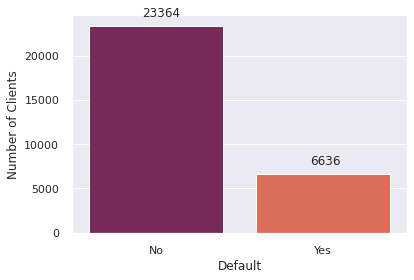

In [112]:
#https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.set_theme(style="darkgrid")
plt.figure(figsize=(6,4))

ax = sns.countplot(x="default", data=df, palette="rocket")

plt.xlabel("Default", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)

plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))
plt.savefig('imbalanced_data.png',dpi=300)    
plt.show()

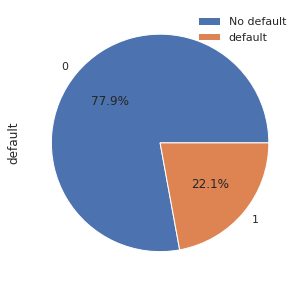

In [113]:
plt.figure(figsize=(7,5))

df['default'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.legend(["No default","default"])
plt.savefig('Imbalanced_data_2',dpi=300)
plt.show()

from above two figures we can see that the data is highly imbalanced.

Let us check if there is any relation between features and target column

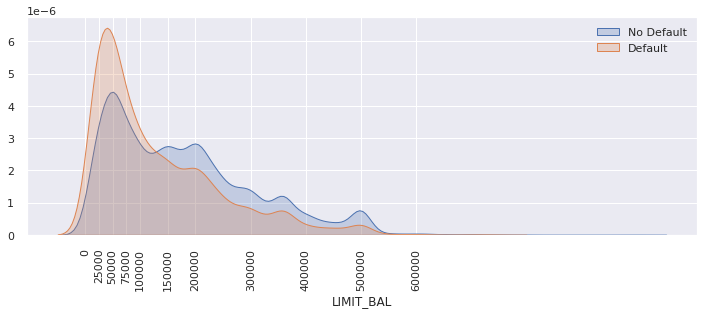

In [114]:
#LIMIT BAL and default
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['default'] == 0), 'LIMIT_BAL'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['default'] == 1), 'LIMIT_BAL'], label = 'Default', shade = True)
plt.xticks([0,25000,50000,75000,100000,150000,200000,300000,400000,500000,600000],rotation = 90) 
plt.ylabel('')
plt.legend()
plt.savefig('limit_bal',dpi=300)
plt.show()

from above plot people with Limit_bal less than 150000 are showing a high chance of default .So this feature is important for predicting the defaulters.

In [14]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

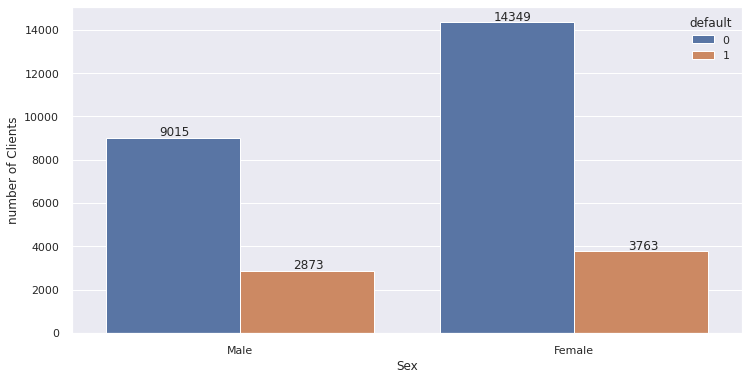

In [115]:
#sex
plt.figure(figsize=(12,6))

ax = sns.countplot(data = df, x = 'SEX', hue="default")

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("number of Clients", fontsize= 12)

plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+100))
plt.savefig('Gender',dpi=300)
plt.show()

defaulters are present in both male and female , let us take another plot to check % defulters in each sex.


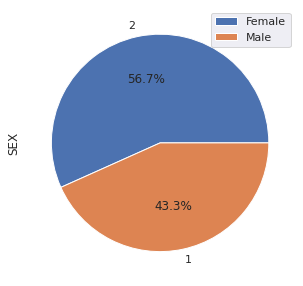

In [16]:
plt.figure(figsize=(7,5))
df[df['default']==1]["SEX"].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.legend(["Female","Male"])
plt.show()

It looks like gender is having less influence on credit defaults. As in our origincal data , Females are more in number than men

In [17]:
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [18]:
#Education EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others,5=unknown, 6=unknown)
df['default'].groupby(df['EDUCATION']).value_counts(normalize = True)

EDUCATION  default
0          0          1.000000
1          0          0.807652
           1          0.192348
2          0          0.762651
           1          0.237349
3          0          0.748424
           1          0.251576
4          0          0.943089
           1          0.056911
5          0          0.935714
           1          0.064286
6          0          0.843137
           1          0.156863
Name: default, dtype: float64

We can see values of defaulters in education value : 0,5 are very low. Hence I am grouping them with 5

In [19]:
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(0,5)

In [20]:
df['default'].groupby(df['EDUCATION']).value_counts(normalize = True)

EDUCATION  default
1          0          0.807652
           1          0.192348
2          0          0.762651
           1          0.237349
3          0          0.748424
           1          0.251576
4          0          0.943089
           1          0.056911
5          0          0.938776
           1          0.061224
6          0          0.843137
           1          0.156863
Name: default, dtype: float64

As both 5 and 6 are pointing to unknown education details , We can club them together.


In [21]:
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(6,5)

In [22]:
df['default'].groupby(df['EDUCATION']).value_counts(normalize = True)

EDUCATION  default
1          0          0.807652
           1          0.192348
2          0          0.762651
           1          0.237349
3          0          0.748424
           1          0.251576
4          0          0.943089
           1          0.056911
5          0          0.924638
           1          0.075362
Name: default, dtype: float64

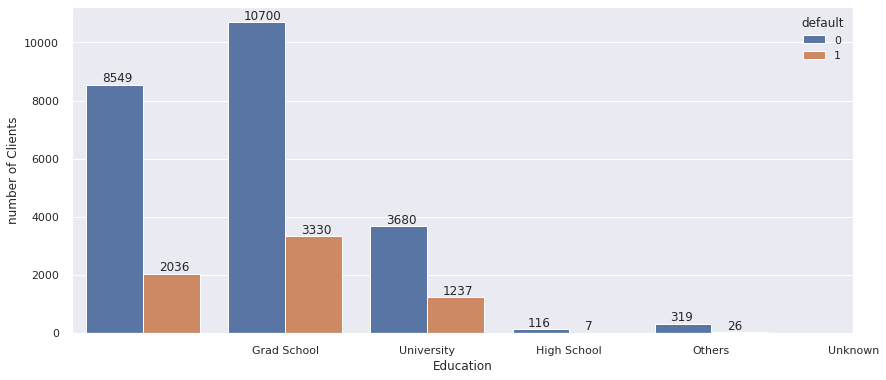

In [117]:
plt.figure(figsize=(14,6))

ax = sns.countplot(data = df, x = 'EDUCATION', hue="default")

plt.xlabel("Education", fontsize= 12)
plt.ylabel("number of Clients", fontsize= 12)

plt.xticks([1,2,3,4,5],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+100))
plt.savefig('Education',dpi=300)
plt.show()

In [24]:
df[df['default']==1]["EDUCATION"].value_counts()

2    3330
1    2036
3    1237
5      26
4       7
Name: EDUCATION, dtype: int64

In [25]:
df[df['default']==1]["EDUCATION"].value_counts(normalize = True)

2    0.501808
1    0.306811
3    0.186407
5    0.003918
4    0.001055
Name: EDUCATION, dtype: float64

Education EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others,5=unknown, 6=unknown)

From above plots and code ,we can see clients from  University,Gratuate school, High school  are high in number of defaulters .
it implies that the feature Education is important for our analysis.

In [26]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [27]:
#MARRIAGE: Marital status (1=married, 2=single, 3=others)
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

taking Marriage=0 as Unknown

In [28]:
df['default'].groupby(df['MARRIAGE']).value_counts(normalize = True)

MARRIAGE  default
0         0          0.907407
          1          0.092593
1         0          0.765283
          1          0.234717
2         0          0.790717
          1          0.209283
3         0          0.739938
          1          0.260062
Name: default, dtype: float64

In [29]:
df[df['default']==1]["MARRIAGE"].value_counts(normalize = True)

2    0.503466
1    0.483122
3    0.012658
0    0.000753
Name: MARRIAGE, dtype: float64

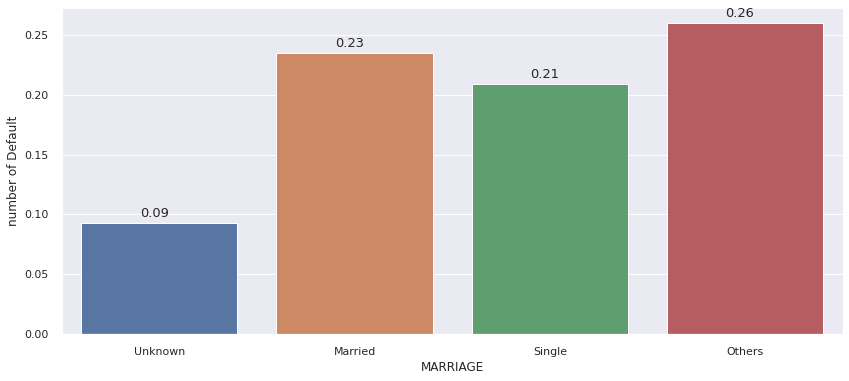

In [118]:
plt.figure(figsize=(14,6))

ax = sns.barplot(x = "MARRIAGE", y = "default", data = df,ci=None)

plt.ylabel("number of Default", fontsize= 12)

plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Others'],fontsize=11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.005),fontsize=13)
plt.savefig('marriage',dpi=300)
plt.show()

most defaulteed people are in Others , Married and single categories . 

In [31]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

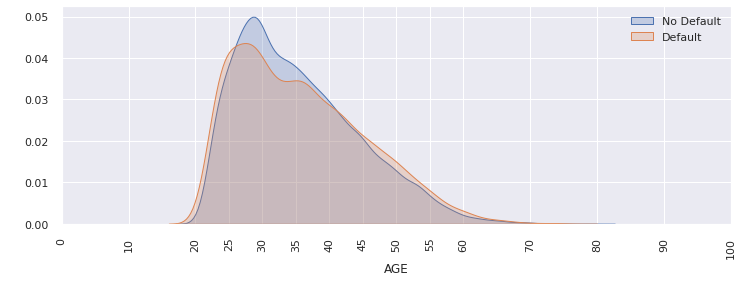

In [119]:
#AGE
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['default'] == 0), 'AGE'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['default'] == 1), 'AGE'], label = 'Default', shade = True)
plt.xticks([0,10,20,25,30,35,40,45,50,55,60,70,80,90,100],rotation = 90)
plt.ylabel(" ")
plt.legend()
plt.savefig('Age',dpi=300)
plt.show()

We can notice that defaulter clients are  with age >25 and less than 40  mostly

As seen earlier the data set is imbalanced so , let us try to balance it using SMOTE Technique.


In [33]:
#https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/


In [34]:
X= df.drop(["default"],axis="columns")
y=df["default"]

In [35]:
df.shape

(30000, 25)

In [36]:
X.shape

(30000, 24)

In [37]:
X.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [38]:
y.shape

(30000,)

In [39]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64

#Test Train split


In [40]:
from sklearn.model_selection import train_test_split
  
# split into 75:25 ration with stratifying y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0,stratify=y)

In [41]:
print("X_train",X_train.shape,"y_train",y_train.shape,"X_test",X_test.shape,"y_test",y_test.shape,sep="\n")

X_train
(22500, 24)
y_train
(22500,)
X_test
(7500, 24)
y_test
(7500,)


In [42]:
y_train.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default, dtype: float64

In [43]:
y_test.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default, dtype: float64

In [44]:
#using smote to deal with Imbalance in data.
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 4977
Before OverSampling, counts of label '0': 17523 

After OverSampling, the shape of train_X: (35046, 24)
After OverSampling, the shape of train_y: (35046,) 

After OverSampling, counts of label '1': 17523
After OverSampling, counts of label '0': 17523


#Model for classification


#XGboost Classifier

https://xgboost.readthedocs.io/en/stable/python/python_api.html

In [45]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [46]:
space={'n_estimators':[50,100,200],
'learning_rate':[0.05,0.1],
'max_depth':[10,20]}

In [47]:
Classifier = XGBClassifier()

In [48]:
#xg_search=GridSearchCV(Classifier,space,scoring='f1',n_jobs=-1,verbose=3)

In [49]:
#result=xg_search.fit(X_train_res, y_train_res)  commenting as it takes 20 minutes to run  

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [50]:
#print(result.best_params_)

{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200}


In [60]:
#best_params=dict(result.best_params_)
#print(best_params)

{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200}


In [51]:
XGclassifier=XGBClassifier(learning_rate=0.1,max_depth=20,n_estimators=200)


In [52]:
XGclassifier.fit(X_train_res, y_train_res)

XGBClassifier(max_depth=20, n_estimators=200)

In [53]:
y_pred=XGclassifier.predict(X_test)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      5841
           1       0.50      0.42      0.46      1659

    accuracy                           0.78      7500
   macro avg       0.67      0.65      0.66      7500
weighted avg       0.77      0.78      0.77      7500



In [55]:
y_pred_proba=XGclassifier.predict_proba(X_test)

In [58]:
print(y_pred,y_pred_proba,sep="\n")

[0 0 0 ... 0 0 0]
[[0.9916767  0.00832334]
 [0.9943293  0.00567074]
 [0.9688109  0.03118907]
 ...
 [0.83502215 0.16497786]
 [0.8274799  0.17252009]
 [0.9893053  0.01069466]]


#using Logistic regressor

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr_clf=LogisticRegression(random_state=0)
lr_clf.fit(X_train_res,y_train_res)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [63]:
lr_y_pred=lr_clf.predict(X_test)
lr_y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [65]:
lr_y_pred_proba=lr_clf.predict_proba(X_test)
lr_y_pred_proba

array([[0.40064776, 0.59935224],
       [0.89058826, 0.10941174],
       [0.55248394, 0.44751606],
       ...,
       [0.6795616 , 0.3204384 ],
       [0.526613  , 0.473387  ],
       [0.80967474, 0.19032526]])

In [66]:
print(classification_report(y_test,lr_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.59      0.70      5841
           1       0.30      0.62      0.40      1659

    accuracy                           0.60      7500
   macro avg       0.57      0.60      0.55      7500
weighted avg       0.72      0.60      0.63      7500



#Using Support Vector Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [67]:
from sklearn.svm import SVC

In [73]:
SVC_clf=SVC(random_state=0,probability=True)

In [74]:
SVC_clf.fit(X_train_res,y_train_res)

SVC(probability=True, random_state=0)

In [75]:
y_pred_SVC=SVC_clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
y_pred_proba_SVC=SVC_clf.predict_proba(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
print(classification_report(y_test,y_pred_SVC))

              precision    recall  f1-score   support

           0       0.86      0.50      0.63      5841
           1       0.29      0.72      0.41      1659

    accuracy                           0.55      7500
   macro avg       0.58      0.61      0.52      7500
weighted avg       0.73      0.55      0.58      7500



#using Decision Trees
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [78]:
 from sklearn.tree import DecisionTreeClassifier

In [80]:
dt_clf=DecisionTreeClassifier(random_state=0)

In [81]:
dt_clf.fit(X_train_res,y_train_res)

DecisionTreeClassifier(random_state=0)

In [82]:
y_pred_dt=dt_clf.predict(X_test)

In [83]:
y_pred_dt

array([0, 0, 1, ..., 0, 0, 1])

In [84]:
y_pred_dt_proba=dt_clf.predict_proba(X_test)

In [85]:
y_pred_dt_proba

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [86]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      5841
           1       0.34      0.48      0.40      1659

    accuracy                           0.68      7500
   macro avg       0.59      0.61      0.59      7500
weighted avg       0.72      0.68      0.69      7500



#using Random Forest classifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [87]:
 from sklearn.ensemble import RandomForestClassifier
 

In [88]:
rf_clf=RandomForestClassifier(random_state=0,n_estimators=200,max_depth=20)

In [89]:
rf_clf.fit(X_train_res,y_train_res)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=0)

In [90]:
y_pred_rf=rf_clf.predict(X_test)

In [91]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
y_pred_proba_rf=rf_clf.predict_proba(X_test)

In [93]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      5841
           1       0.50      0.48      0.49      1659

    accuracy                           0.78      7500
   macro avg       0.68      0.67      0.67      7500
weighted avg       0.78      0.78      0.78      7500



#Comparing models using F1 Score

In [94]:
from sklearn.metrics import f1_score

In [96]:
print("F1 score of XG boost Classifier is: ", f1_score(y_test,y_pred,average='binary'))

F1 score of XG boost Classifier is:  0.4553745928338762


In [97]:
print("F1 score of Logistic Regression is: ", f1_score(y_test, lr_y_pred, average='binary'))

F1 score of Logistic Regression is:  0.4030793525463877


In [98]:
print("F1 score of SVM Classifier is: ", f1_score(y_test, y_pred_SVC, average='binary'))

F1 score of SVM Classifier is:  0.4118257261410788


In [99]:
print("F1 score of Decision Tree Classifier is: ", f1_score(y_test, y_pred_dt, average='binary'))

F1 score of Decision Tree Classifier is:  0.3971208736659221


In [100]:
print("F1 score of Random forest Classifier is: ", f1_score(y_test, y_pred_rf, average='binary'))

F1 score of Random forest Classifier is:  0.4901840490797546


On the basis of F1_score , we can notice Random forest performed well. 

#Comparing models based on AUROC
https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

In [101]:
from sklearn.metrics import roc_curve

In [108]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_proba[:,1])
fpr2, tpr2, thresh2 = roc_curve(y_test, lr_y_pred_proba[:,1])
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_proba_SVC[:,1])
fpr4, tpr4, thresh4 = roc_curve(y_test, y_pred_dt_proba[:,1])
fpr5, tpr5, thresh5 = roc_curve(y_test, y_pred_proba_rf[:,1])
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [109]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_pred_proba[:,1])
auc_score2 = roc_auc_score(y_test, lr_y_pred_proba[:,1])
auc_score3 = roc_auc_score(y_test, y_pred_proba_SVC[:,1])
auc_score4 = roc_auc_score(y_test, y_pred_dt_proba[:,1])
auc_score5 = roc_auc_score(y_test, y_pred_proba_rf[:,1])
print(auc_score1, auc_score2,auc_score3,auc_score4,auc_score5)

0.7413439778812017 0.6362255589889145 0.6604026699499773 0.606714306456851 0.7534578423872568


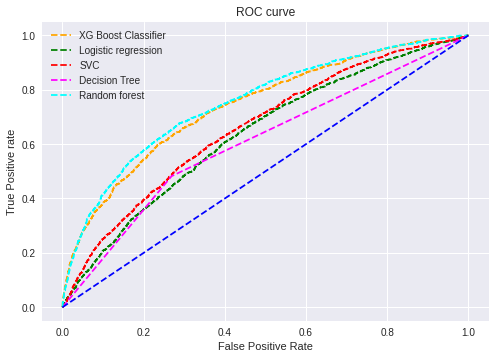

In [111]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='XG Boost Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic regression')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='SVC')
plt.plot(fpr4, tpr4, linestyle='--',color='magenta', label='Decision Tree')
plt.plot(fpr5, tpr5, linestyle='--',color='aqua', label='Random forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Using AUROC also we can see Random Forest model perfromed well.